In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os
from degree_days import dds



def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [4]:
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
au_df, au_dfc = create_matrix_single_region('Austin', year)
au_tensor = get_tensor(au_df, au_dfc)
sd_tensor_copy = sd_tensor.copy()
au_tensor_copy = au_tensor.copy()

In [5]:
a=2
case=2
cost='abs'
H_au, A_au, T_au = learn_HAT(case, au_tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)


In [6]:
H_sd, A_sd, T_sd = learn_HAT(case, sd_tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)

In [54]:
T_sd

array([[ 5.47762386,  0.        ],
       [ 4.82559199,  0.        ],
       [ 5.30817367,  0.        ],
       [ 5.29227929,  0.68079861],
       [ 4.57482162,  4.63097921],
       [ 4.86502524,  3.18419986],
       [ 4.06051521,  7.87547525],
       [ 3.96220786,  9.06247664],
       [ 4.3456739 ,  9.64913735],
       [ 5.3594313 ,  3.65611818],
       [ 5.68151782,  0.08397702],
       [ 6.50460356,  0.16054321]])

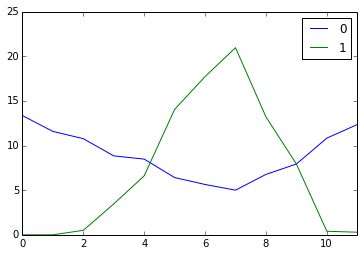

In [7]:
pd.DataFrame(T_au).plot()

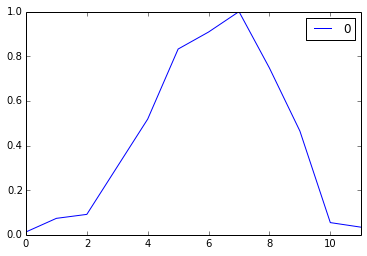

In [8]:
pd.DataFrame(dds[2014]['Austin']).plot()

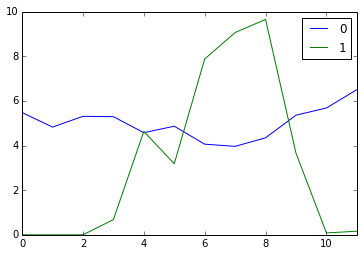

In [9]:
pd.DataFrame(T_sd).plot()

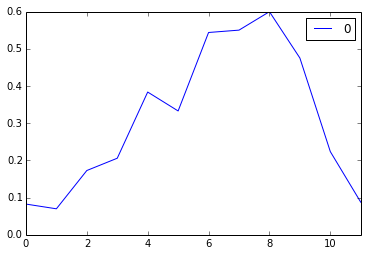

In [10]:
pd.DataFrame(dds[2014]['SanDiego']).plot()

In [66]:
AT_mat = np.einsum('Nab, Ob -> NaO', A_au, T_au)

In [67]:
pd.DataFrame(AT_mat[1])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,9.724289,67.086321,128.167103,272.465139,343.682393,406.431691,256.222280,153.815563,7.702403,5.605690
1,0.0,0.0,0.334494,2.307619,4.408661,9.372190,11.821904,13.980340,8.813472,5.290911,0.264945,0.192823


In [13]:
T_sd

array([[ 5.47762386,  0.        ],
       [ 4.82559199,  0.        ],
       [ 5.30817367,  0.        ],
       [ 5.29227929,  0.68079861],
       [ 4.57482162,  4.63097921],
       [ 4.86502524,  3.18419986],
       [ 4.06051521,  7.87547525],
       [ 3.96220786,  9.06247664],
       [ 4.3456739 ,  9.64913735],
       [ 5.3594313 ,  3.65611818],
       [ 5.68151782,  0.08397702],
       [ 6.50460356,  0.16054321]])

In [47]:
A_au[1]

array([[  0.        ,  19.39461903],
       [  0.        ,   0.66713144]])

In [48]:
A_sd[1]

array([[ 0.        ,  1.19209959],
       [ 0.        ,  9.13924977]])

In [52]:
np.c_[A_au[1], A_sd[1]]

array([[  0.        ,  19.39461903,   0.        ,   1.19209959],
       [  0.        ,   0.66713144,   0.        ,   9.13924977]])

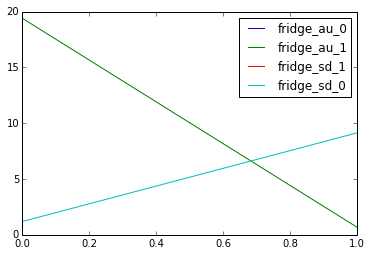

In [53]:
pd.DataFrame(np.c_[A_au[1], A_sd[1]], columns={'fridge_au_0', 'fridge_au_1', 'fridge_sd_0', 'fridge_sd_1'}).plot()

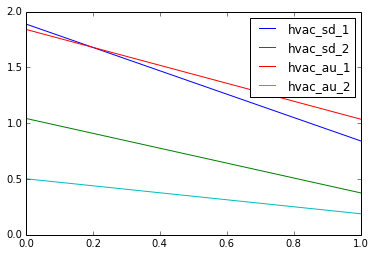

In [44]:
#hvac
pd.DataFrame(np.c_[A_au[2], A_sd[2]], columns={'hvac_au_1', 'hvac_au_2', 'hvac_sd_1', 'hvac_sd_2'}).plot()

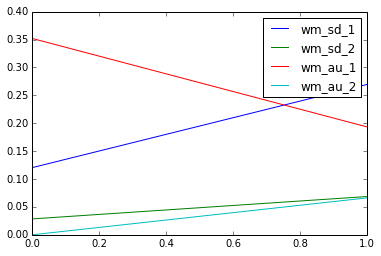

In [43]:
#wm
pd.DataFrame(np.c_[A_au[3], A_sd[3]], columns={'wm_au_1', 'wm_au_2', 'wm_sd_1', 'wm_sd_2'}).plot()

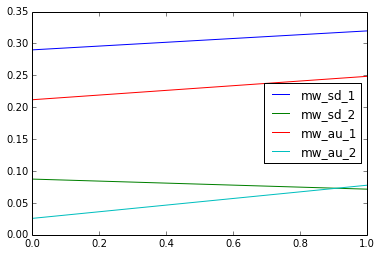

In [42]:
#mw
pd.DataFrame(np.c_[A_au[4], A_sd[4]], columns={'mw_au_1', 'mw_au_2', 'mw_sd_1', 'mw_sd_2'}).plot()

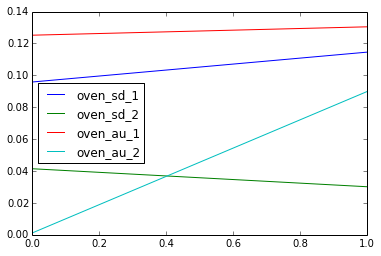

In [45]:
#oven
pd.DataFrame(np.c_[A_au[5], A_sd[5]], columns={'oven_au_1', 'oven_au_2', 'oven_sd_1', 'oven_sd_2'}).plot()

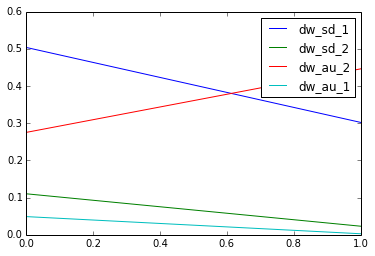

In [46]:
#dw
pd.DataFrame(np.c_[A_au[6], A_sd[6]], columns={'dw_au_1', 'dw_au_2', 'dw_sd_1', 'dw_sd_2'}).plot()